In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [9]:
airbnb_dummies = pd.get_dummies(airbnb, columns = ["neighbourhood_group", "room_type"])
airbnb_dummies.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,0,0,1,0,0,1,0,0


In [16]:
airbnb_dummies.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [22]:
X = airbnb_dummies.iloc[:, [6, 7, 15, 16, 17, 18, 19, 20, 21, 22]]
X.head()

,latitude,longitude,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,0,0,1,0,0,1,0,0
3,40.68514,-73.95976,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,0,0,1,0,0,1,0,0


In [36]:
reg = tree.DecisionTreeRegressor(max_depth = 5)
reg = reg.fit(X, airbnb_dummies["price"])

[Text(167.4, 199.32, 'X[7] <= 0.5\nentropy = 6446.914\nsamples = 37589\nvalue = 125.698'),
 Text(83.7, 163.07999999999998, 'X[1] <= -73.964\nentropy = 1943.315\nsamples = 18314\nvalue = 77.904'),
 Text(41.85, 126.83999999999999, 'X[0] <= 40.687\nentropy = 3466.295\nsamples = 5057\nvalue = 102.91'),
 Text(20.925, 90.6, 'X[0] <= 40.663\nentropy = 1176.309\nsamples = 1296\nvalue = 69.472'),
 Text(10.4625, 54.359999999999985, 'X[0] <= 40.542\nentropy = 721.315\nsamples = 763\nvalue = 58.211'),
 Text(5.23125, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = 235.0'),
 Text(15.693750000000001, 18.119999999999976, 'entropy = 681.191\nsamples = 762\nvalue = 57.979'),
 Text(31.387500000000003, 54.359999999999985, 'X[9] <= 0.5\nentropy = 1386.23\nsamples = 533\nvalue = 85.593'),
 Text(26.15625, 18.119999999999976, 'entropy = 1367.439\nsamples = 523\nvalue = 86.476'),
 Text(36.61875, 18.119999999999976, 'entropy = 194.44\nsamples = 10\nvalue = 39.4'),
 Text(62.775000000000006, 90.6, 'X[0] 

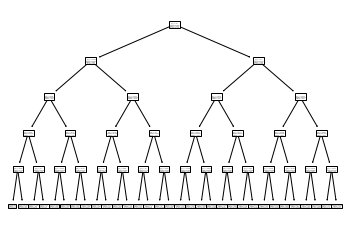

In [37]:
tree.plot_tree(reg)

In [38]:
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("airbnb.dot")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'airbnb.dot'], make sure the Graphviz executables are on your systems' PATH

In [28]:
X.columns

Index(['latitude', 'longitude', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [39]:
with open ("airbnb.dot", "r") as fin:
    with open("airbnb_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","latitude")
            line = line.replace("X[1]","longitude")
            line = line.replace("X[2]","neighbourhood_group_Bronx")
            line = line.replace("X[3]","neighbourhood_group_Brooklyn")
            line = line.replace("X[4]","neighbourhood_group_Manhattan")
            line = line.replace("X[5]","neighbourhood_group_Queens")            
            line = line.replace("X[4]","neighbourhood_group_Staten Island")
            line = line.replace("X[5]","room_type_Entire home/apt")
            line = line.replace("X[6]","room_type_Private room")
            line = line.replace("X[7]","room_type_Shared room")
            fout.write(line)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, airbnb_dummies["price"], test_size = 0.2)

In [41]:
predictions1 = reg.predict(X_test)

In [43]:
import math
mse1 = ((y_test - predictions1)**2).mean()
print("MSE: " + str(mse1))

rmse1 = math.sqrt(mse1)
print("RMSE: " + str(rmse1))

MSE: 3462.268540684808
RMSE: 58.84104469402976


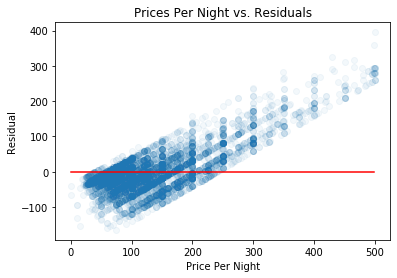

In [70]:
resid = y_test - predictions1
plt.scatter(y_test, resid, alpha = 0.05)
plt.xlabel("Price Per Night")
plt.ylabel("Residual")
plt.title("Prices Per Night vs. Residuals")
x = np.arange(0,500)
y = np.tile(0, len(x))
plt.plot(x,y, color = 'r')
plt.savefig("plots/decision_trees_residuals_plot.png")

In [73]:
import scipy.stats as stats

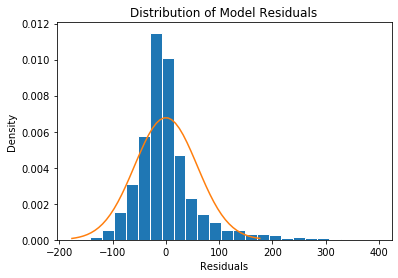

In [79]:
x = np.linspace(resid.mean() - 3 * resid.std(), resid.mean() + 3 * resid.std())
y = stats.norm.pdf(x, resid.mean(), resid.std())
plt.hist(resid, density = True, bins = 25, edgecolor = "w")
plt.plot(x,y)
plt.title("Distribution of Model Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.savefig("plots/decision_tree_resid_dist.png")